# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
data.query('Fresh>Frozen and Grocery > Delicatessen and Milk> Detergents_Paper').head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451


In [4]:
data[(data.Fresh>data.Fresh.mean()) & \
     (data.Frozen>data.Frozen.mean()) & \
    # (data.Milk>data.Milk.mean()) & \
     (data.Grocery<data.Grocery.mean()) &\
     (data.Detergents_Paper<data.Detergents_Paper.mean()) &\
     (data.Delicatessen>data.Delicatessen.mean())]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
22,31276,1917,4469,9408,2381,4334
39,56159,555,902,10002,212,2916
40,24025,4332,4757,9510,1145,5864
89,24904,3836,5330,3443,454,3178
112,19046,2770,2469,8853,483,2708
113,14438,2295,1733,3220,585,1561
124,36050,1642,2961,4787,500,1621
195,17023,5139,5230,7888,330,1755


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1, 120, 240]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,17160,1200,3412,2417,174,1136
2,22096,3575,7041,11422,343,2564


In [6]:
display((samples-data.mean())/data.mean())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-0.411931,0.692469,0.203329,-0.426420,0.142810,0.164689
1,0.429965,-0.792970,-0.570887,-0.213199,-0.939615,-0.255019
2,0.841288,-0.383224,-0.114482,2.718181,-0.880964,0.681454


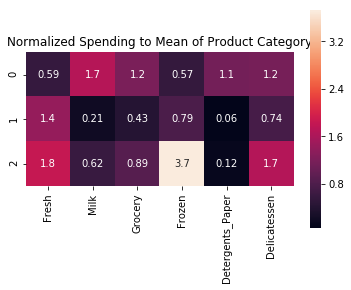

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("Normalized Spending to Mean of Product Category")
sns.heatmap(samples/data.mean(), annot=True, square=True, cbar=True)

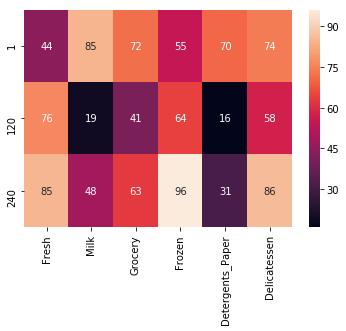

In [8]:
import seaborn as sns

percentiles_data = 100*data.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]
sns.heatmap(percentiles_samples, annot=True)


In [9]:
percentiles_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
1,44.090909,84.772727,71.818182,54.545455,70.454545,74.090909
120,76.136364,19.090909,41.136364,63.863636,15.909091,57.727273
240,85.000000,48.409091,63.181818,96.136364,31.363636,86.363636


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
Customer 0 may be conducting retail business as it has below average Fresh spending, and above average Milk spending and slightly above average Grocery spending and close to average Detergents_Paper and Delicatessen spending.  

Customer 1 may be a Restaurant as it has above average of Fresh spending, below average Milk, Grocery, Detergents_paper and Delicatessen spending. 

Customer 2 may be a buffet Restaurant as it has above average spending for Fresh, Frozen, Delicatessen, below average spending for Milk, Detergents_paper and close average spending for Grocery. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [10]:
# Import 
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
scores = []
print('item, score')
for item in data.keys():
    new_data = data.drop(columns=item)
    X = new_data.values
    y = data[item]


    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=29)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=29).fit(X_train,y_train)
    y_pred   = regressor.predict(X_test)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    display([item, score])
    scores.append(score)
    


item, score


/Users/marialin/anaconda/envs/myenv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


['Fresh', 0.21775234366376872]

['Milk', 0.35167328060580583]

['Grocery', 0.77521299948225175]

['Frozen', -3.2987294614428055]

['Detergents_Paper', 0.77502271478108398]

['Delicatessen', 0.39305937492344423]

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

### <font color=green> Required Change 1 </font> ###

**Answer:**

* I attempt to predict all categories one-by-one. 

* The reported prediction score for Fresh is 0.218, for Milk is 0.365, for Delicatessen is 0.393 which are not high. This means that the Fresh, Milk and Delicatessens' spending are hard to predict using the other features. The prediction score for Grocery and Detergents_Paper are both 0.775. This means that these spending can be predicted using the other features. The prediction score for Frozen is negative. This means that the model fails to fit the data. 

<font color=green> **Revised Answer 3:** </font>

* <font color=green> Customers' spending on Grocery and Detergents_Paper can be predicted using other features which means they are correlated with other features and are not independent features. Therefore in term of feature selection, dependent features are not as important as independent features as they can be partially replaced by their related features. If one feature is 100% correlated with another feature then that feature can be dropped. Those independent features, like Frozen, that can't be predicted by other features are the important features for identifying customers' spending habits. </font>

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/Users/marialin/anaconda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


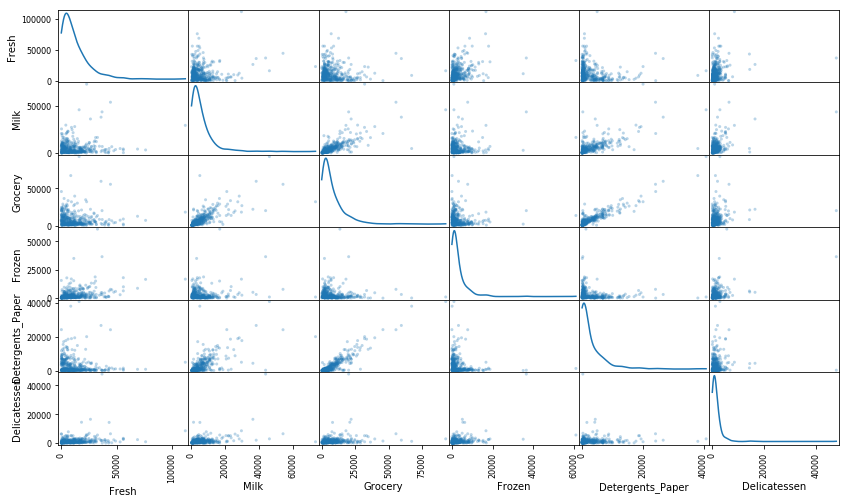

In [11]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**


* Answer 1: The distribution of each column (see below cells) are not normal distribution. There are large number of points near 0. There are outliers. 

* Answer 2: 
-Answer: Yes. Below lists the pairs that exhibit some degree of correlation:
     - Milk and Grocery
     - Milk and Detergents_Paper
     - Grocery and Detergents_Paper
* Answer 3: This confirm my suspicions about the relevance of the features on Grocery and Detergents_Paper, which I attempted to predict. 


- Answer 4 : The data for those features seems to be half-Gaussian (or log-normal) distributed (See cells below for the distributions)



Text(0,0.5,'Fresh cost')

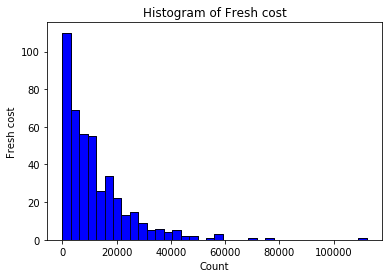

In [12]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(data['Fresh'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(data['Fresh'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Fresh cost')
plt.xlabel('Count')
plt.ylabel('Fresh cost')

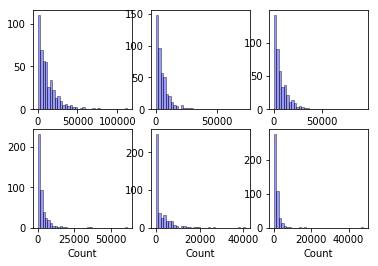

In [13]:
#Ref: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
        
plt.figure()
# Iterate through all the columns
i=1;
for column in data:
    # Subset to the each column
    subset = data[column]
    
    plt.subplot(2, 3, i)
    # Draw the density plot
    sns.distplot(subset, hist = True, kde = False,
                #bins=int(data[column].max()/20), color = 'blue',
                bins=int(180/5), color = 'blue',
                hist_kws={'edgecolor':'black'})                 
                #kde_kws = {'linewidth': 3},
                #label = data[column].name)
    i=i+1
    
    # Plot formatting
    plt.xlabel('Count')
    #plt.ylabel(data[column].name)
    plt.legend(prop={'size': 10}) #, title = data[column].name)

In [14]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


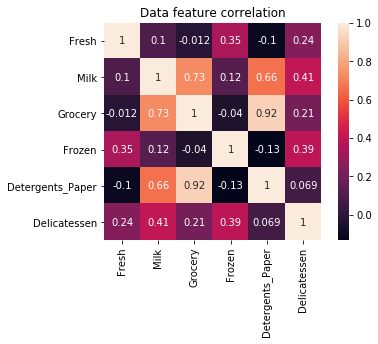

In [15]:
plt.title("Data feature correlation")
sns.heatmap(data.corr(), annot=True, square=True, cbar=True)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

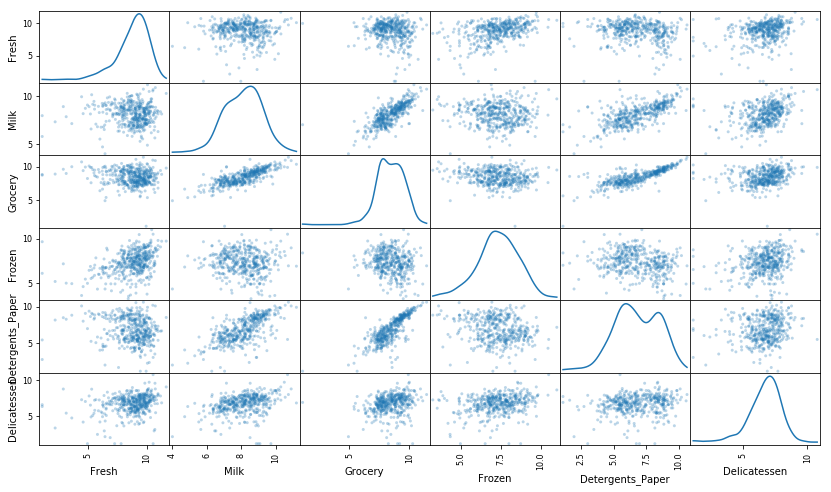

In [16]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [17]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,9.750336,7.090077,8.135054,7.790282,5.159055,7.035269
2,10.003152,8.181720,8.859505,9.343297,5.837730,7.849324


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [18]:
# For each feature find the data points with extreme high or low values
pd_outliers = pd.DataFrame()
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    outliers_new = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    pd_outliers = pd_outliers.append(outliers_new)
    display(outliers_new)
    display(pd_outliers.index)

    
# OPTIONAL: Select the indices for data points you wish to remove
outliers_  = pd_outliers.index

# Remove the outliers, if any were specified
# good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Int64Index([65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355,
            357, 412],
           dtype='int64')

Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Int64Index([ 65,  66,  81,  95,  96, 128, 171, 193, 218, 304, 305, 338, 353,
            355, 357, 412,  86,  98, 154, 356],
           dtype='int64')

Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Int64Index([ 65,  66,  81,  95,  96, 128, 171, 193, 218, 304, 305, 338, 353,
            355, 357, 412,  86,  98, 154, 356,  75, 154],
           dtype='int64')

Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Int64Index([ 65,  66,  81,  95,  96, 128, 171, 193, 218, 304, 305, 338, 353,
            355, 357, 412,  86,  98, 154, 356,  75, 154,  38,  57,  65, 145,
            175, 264, 325, 420, 429, 439],
           dtype='int64')

Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Int64Index([ 65,  66,  81,  95,  96, 128, 171, 193, 218, 304, 305, 338, 353,
            355, 357, 412,  86,  98, 154, 356,  75, 154,  38,  57,  65, 145,
            175, 264, 325, 420, 429, 439,  75, 161],
           dtype='int64')

Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Int64Index([ 65,  66,  81,  95,  96, 128, 171, 193, 218, 304, 305, 338, 353,
            355, 357, 412,  86,  98, 154, 356,  75, 154,  38,  57,  65, 145,
            175, 264, 325, 420, 429, 439,  75, 161,  66, 109, 128, 137, 142,
            154, 183, 184, 187, 203, 233, 285, 289, 343],
           dtype='int64')

### <font color=green> Required Change 2 </font> ###

### <font color= green> Revised Answer </font> ###

<font color = green > In this revision, I have removed only the outliers for more than one features. There are 5 outliers among 440 samples which is small percentage of the samples. See below implementation. </font>

In [19]:
import collections

# Tally occurrences of words in a list
cnt = collections.Counter()
for word in outliers_:
    cnt[word] += 1
outliers_dict=dict(cnt.most_common(5))

In [20]:
outliers_dict

{65: 2, 66: 2, 75: 2, 128: 2, 154: 3}

In [21]:
outliers=list(outliers_dict.keys())

In [22]:
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

In [23]:
len(good_data)

435

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**


* Answer 1: Yes, there are. For example, data points 65 and 66 (see above cell's results).


* Answer 2: Yes. These outliers data points should be removed from the dataset.


* <font color=green> Answer 3: All the outliers identified in the above cell were added to the outliers_ list first. In my previous solution, I have removed all the Tukey outliers, which is about 10% of our dataset, and it is too huge to be removed. Therefore, in this revision, I have removed only the outliers for more than one features. There are 5 outliers for more than one features among 440 samples which is small percentage of the samples. Removing these extreme outliers are neccessary. For example, if k-means is used to cluster the points, these outliers will shift the k-means cluster centres toward them. These outliers are far from the other points. They will create problems that the cluster centres may be shifted away from other points. Therefore, they should be removed. 

 </font>





## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

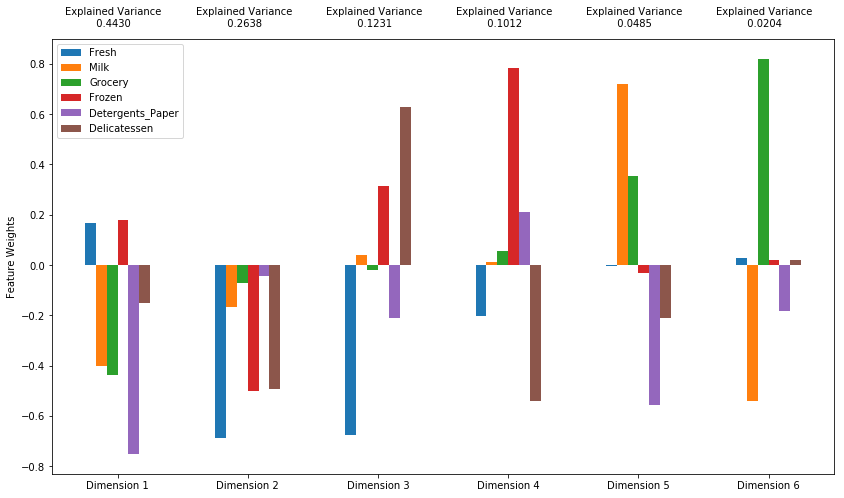

In [24]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6, random_state=1).fit(good_data)


# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)


# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [25]:
pca.explained_variance_ratio_

array([ 0.44302505,  0.26379218,  0.1230638 ,  0.10120908,  0.04850196,
        0.02040793])

In [26]:
np.sum(pca.explained_variance_ratio_[0:2])

0.70681723080681369

In [27]:
np.sum(pca.explained_variance_ratio_[0:4])

0.9310901099509612

In [28]:
display(pca.explained_variance_ratio_.cumsum())

array([ 0.44302505,  0.70681723,  0.82988103,  0.93109011,  0.97959207,  1.        ])

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

### <font color=green> Required Change 3 </font> ###

**<font color = green> Revised Answer: </font> **


* <font color = green> The first two principal components (PC) explain 70.68% of the variance. The first four PCs explain 93.1% of the variance.
 </font>
 
    -  <font color = green> PC 1 explains 44.3% of the variance. PC 1 represents spending in Detergents_Paper, Grocery and Milk. Retail stores may have relatively larger magnetude of PC 1 value than restaurants. As PC 1 explains around 44% of the variance which is a dominant component, based on PC 1's value, one may be able to classify which segment of business that a sample belongs to. </font>
    
    -  <font color = green>PC 2 explains 26.38% of the variance. PC 2 respresents spending on Frozen, Fresh and Delicatessen. Restaurants type of business may have relatively larger magnetude of PC 2 components than retails. </font>

    -  <font color = green>PC 3 explains 12.3% of the variance. This shows that PC 3 is not a very important dimension and can be dropped.  </font>

    -  <font color = green>PC 4 explains 10.1% of the variance. PC 4 is also not an important dimension and can be dropped. </font>
    
<font color = green> The sign of a PCA dimension itself is not important, only the relative signs of features forming the PCA dimension are important. By running the PCA code again, one might get the PCA dimensions with the signs inversed. </font> 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [29]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7887,-0.8123,0.2315,-0.0036,0.1194,-0.2106
1,1.9882,-0.8101,0.0065,-0.3952,-0.0363,0.6381
2,0.9197,-2.4257,0.7222,0.5280,0.4052,0.5744


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [30]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2,random_state=1).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [31]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7887,-0.8123
1,1.9882,-0.8101
2,0.9197,-2.4257


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

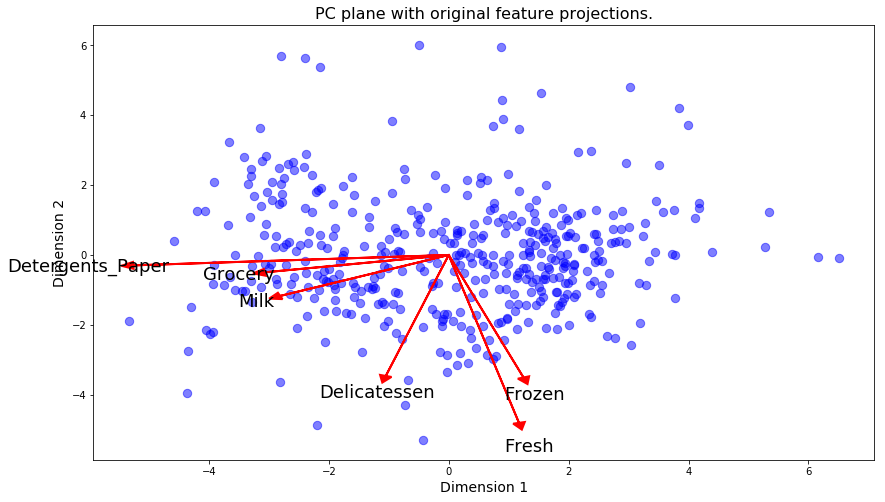

In [32]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* Answer 1: 
        The advantages of K-Means is that it is fast; It is good for high dimensional data and it is easy to interpret and implement. It is a hard clustering algorithm which assigns each sample to a definite cluster by comparing the distance between the sample and the cluster centers.
    
* Answer 2: 
        The advantages of Gaussian Mixture Model clustering algorithm is that it does not assume clusters to be of any geometry; It works well with non-linear geometric distributions and it  does not bias the cluster sizes to have specific structures as does by K-Means (Circular). It is a soft clustering algorithm.

* Answer 3:
        I will use GMM. K-means is hard clustering. When there is overlap of among clusters, soft clustering will be a better choice. Furthermore, the dimension of data is 6 which is not very high and I am not sure whether the clusters are of any geometry. I will also try KMeans as a comparison.
           

Ref: https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [33]:
# TODO: Apply your clustering algorithm of choice to the reduced data 

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
clusterer = GaussianMixture(n_components=2, random_state=1).fit(reduced_data)
clustererK = KMeans(n_clusters=2, random_state=1).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
predsK = clustererK.predict(reduced_data)


# TODO: Find the cluster centers
centers = clusterer.means_
centersK = clustererK.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
sample_predsK = clustererK.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
scoreK = silhouette_score(reduced_data,predsK)
display([score, scoreK])

[0.4219168464626149, 0.4262810154691084]

<font color=green> The following is suggested by reviewer on checking the accuracy score </font>

In [34]:
# The following is suggested by reviewer on checking the accuracy score
channel_labels = pd.read_csv("customers.csv")["Channel"]
channel_labels = channel_labels.drop(channel_labels.index[outliers]).reset_index(drop = True) - 1
channel_labels = abs(channel_labels -1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(channel_labels,preds)
display(accuracy)
from sklearn.metrics import confusion_matrix
confusion_matrix(channel_labels,preds)

0.90114942528735631

array([[126,  15],
       [ 28, 266]])

Text(0,0.5,'Dimension 2')

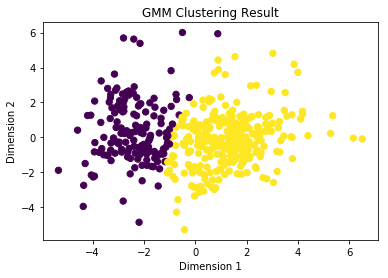

In [35]:
plt.title('GMM Clustering Result')
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], c=preds, s=40, cmap='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Text(0,0.5,'Dimension 2')

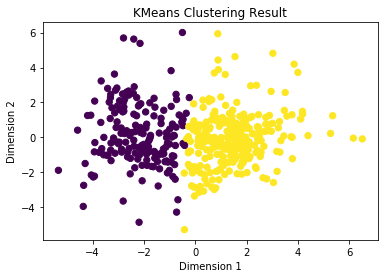

In [36]:
plt.title('KMeans Clustering Result')
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], c=predsK, s=40, cmap='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

In [37]:
clusterer.means_

array([[-2.22116886,  0.31977698],
       [ 1.2512378 , -0.18013806]])

In [38]:
clusterer.covariances_

array([[[ 1.35892683,  0.15806675],
        [ 0.15806675,  3.58464878]],

       [[ 1.98464203,  0.53646979],
        [ 0.53646979,  2.11521139]]])

In [39]:
# Try different number of clusters for GMM

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


def try_diff_clusters(num_components):
    scores=[]
    i=0
    for n_component in num_components:
        clusterer = GaussianMixture(n_components=n_component, random_state=1)
        clusterer.fit(reduced_data)

        # TODO: Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)

        # TODO: Find the cluster centers
        centers = clusterer.means_

        # TODO: Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)

        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(reduced_data, preds)
        print('number of cluster=', n_component,'; score =', score)
        scores.append(score)
        i=i+1
    
    return scores
num_components = range(2,11)
scores = try_diff_clusters(num_components)

number of cluster= 2 ; score = 0.421916846463
number of cluster= 3 ; score = 0.366083165806
number of cluster= 4 ; score = 0.289401579085
number of cluster= 5 ; score = 0.334054632509
number of cluster= 6 ; score = 0.298890336115
number of cluster= 7 ; score = 0.324177023629
number of cluster= 8 ; score = 0.341422026671
number of cluster= 9 ; score = 0.301891083699
number of cluster= 10 ; score = 0.295015979817


In [40]:
# Try different number of clusters for GMM
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


def try_diff_clusters(num_components, clusterAlgo):
    scores=[]
    i=0
    for n_component in num_components:
        if clusterAlgo == 'GMM':
            clusterer = GaussianMixture(n_components=n_component, random_state=1).fit(reduced_data)
            # TODO: Find the cluster centers
            centers = clusterer.means_
        else: 
            clusterer = KMeans(n_clusters=n_component, random_state=1).fit(reduced_data)
            centers = clusterer.cluster_centers_
            
       # TODO: Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)
 
        # TODO: Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)

        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(reduced_data, preds)
        print('number of cluster=', n_component,'; score =', score)
        scores.append(score)
        i=i+1
    
    return scores
num_components = range(2,11)
display('Number of Clusters & Scores for GMM')
scores = try_diff_clusters(num_components, 'GMM')
display('Number of Clusters & Scores for KMeans')
scores = try_diff_clusters(num_components, 'KMeans')



'Number of Clusters & Scores for GMM'

number of cluster= 2 ; score = 0.421916846463
number of cluster= 3 ; score = 0.366083165806
number of cluster= 4 ; score = 0.289401579085
number of cluster= 5 ; score = 0.334054632509
number of cluster= 6 ; score = 0.298890336115
number of cluster= 7 ; score = 0.324177023629
number of cluster= 8 ; score = 0.341422026671
number of cluster= 9 ; score = 0.301891083699
number of cluster= 10 ; score = 0.295015979817


'Number of Clusters & Scores for KMeans'

number of cluster= 2 ; score = 0.426281015469
number of cluster= 3 ; score = 0.397423420008
number of cluster= 4 ; score = 0.331256525802
number of cluster= 5 ; score = 0.340750045423
number of cluster= 6 ; score = 0.364588881579
number of cluster= 7 ; score = 0.36487535911
number of cluster= 8 ; score = 0.349186185109
number of cluster= 9 ; score = 0.359879014605
number of cluster= 10 ; score = 0.371816072873


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

* Answer 1: I have tried cluster numbers from 2 to 10 for both GMM and KMeans clustering algorithms.
* Answer 2: Among all the number of clusters that I have tried, number of cluster =2 has the best silhouette score for both GMM and KMeans clustering algorithms.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

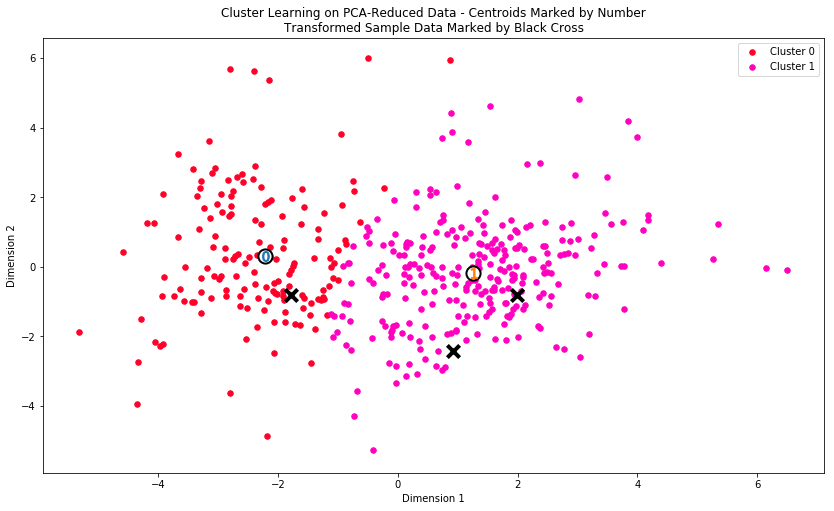

In [41]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [42]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# Inverse transform the reduced_data
log_reduced_data = pca.inverse_transform(reduced_data)

# Exponentiate the log reduced data
true_reduced_data = np.exp(log_reduced_data)
true_reduced_data = pd.DataFrame(np.round(true_reduced_data), columns=data.keys())


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


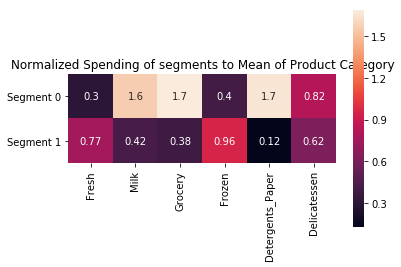

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.axes().set_title("Normalized Spending of segments to Mean of Product Category")
sns.heatmap(true_centers/true_reduced_data.mean(), annot=True, square=True, cbar=True)

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Segment 0 has above-average spending on Milk, Grocery and Detergents_Paper, low spending on Fresh and Frozen and average spending on Delicatessen. This could be the profile of a  retail store.
 
Segment 1 has relatively more spending on Fresh and Frozen than Segment 0, below-average spending on Milk, Grocery and Detergents_Paper and relative lessor spending on Delicatessen than Segment 0. This could be a profile of restaurants selling mostly cooked food made from fresh and frozen food.


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [44]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

*  Answer 1: 
    - Sample point 0 is closed to the center of Segment 0 which is quite the same of my initial guess that it is a retail business. 
    - Sample point 1 and 2 are predicted to be in Segment 1 which are quite close to my initial guess that these are restaurant type of businesses. The clustering model supports my initial guess. 

*  Answer 2: Yes. My predictions for each sample point are consistent with the clustering results.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

* The wholesale distributor now understands that its customers are mainly clustered into two segments. One segment is retail and another segment is restaurants businesses. Intuitively, the wholesale distributor may try to increase the delivery frequency to restaurants business and may get positive response. The wholesale distributer may run A/B test on this to confirm. 

* Alternatively, to top up both clusters' inventories, for retail customers, they may need frequent top up on Milk, Delicatessen, Grocery and Detergents_Paper while restaurants businesses may need more frequent top up on Fresh and Frozen categories of products. To confirm which group of customers it affects the most may need A/B tests on changing delivery frequency by categories of products for each cluster.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

* Answer: A supervised learner could be used to train on the original customers with the customer segment that the customer belongs to as the target variable. We can then use their estimated product spending as input to predict which customer segment they belong to.



### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

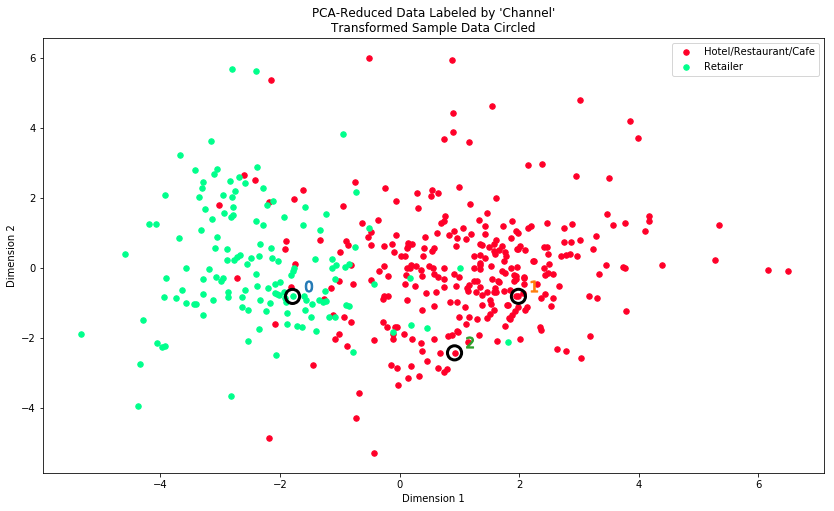

In [45]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

*  Answer 1: Compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers, the clustering algorithm perform very well in finding the best number of clusters which is two. 

*  Answer 2: There will be samples that could be mis-classified as two clusters's distribution has small overlap sections. 

*  Answer 3: These classifications are not very consistent with my previous definition of customer segments. My previous definition are more based on the spendings are above average in all categories or not. Classification algorithms can give more insights then guessing.

<font color=green> Below is to explore to check how balanced are the clusters obtained from different values of number of clusters, using the code given in the [link](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py) </font>

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.426281015469
For n_clusters = 3 The average silhouette_score is : 0.390300538799
For n_clusters = 4 The average silhouette_score is : 0.332930419681
For n_clusters = 5 The average silhouette_score is : 0.352208874353
For n_clusters = 6 The average silhouette_score is : 0.364587525833


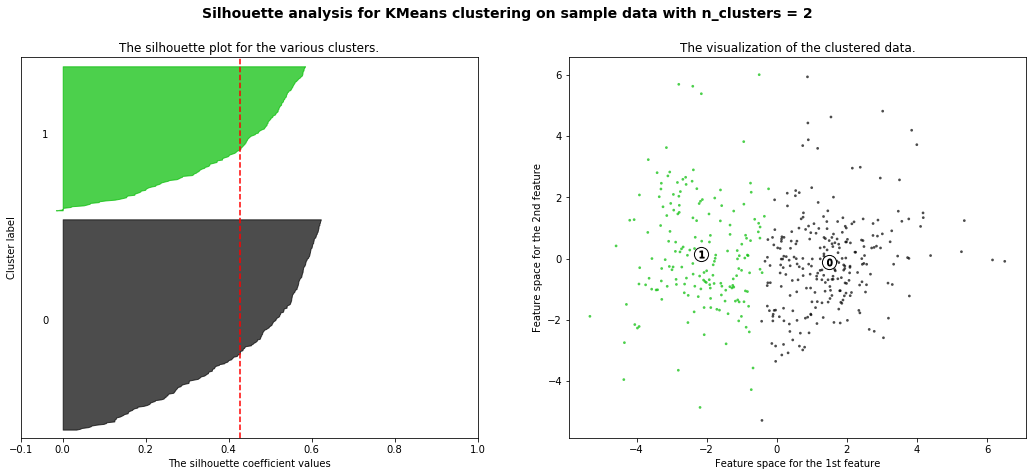

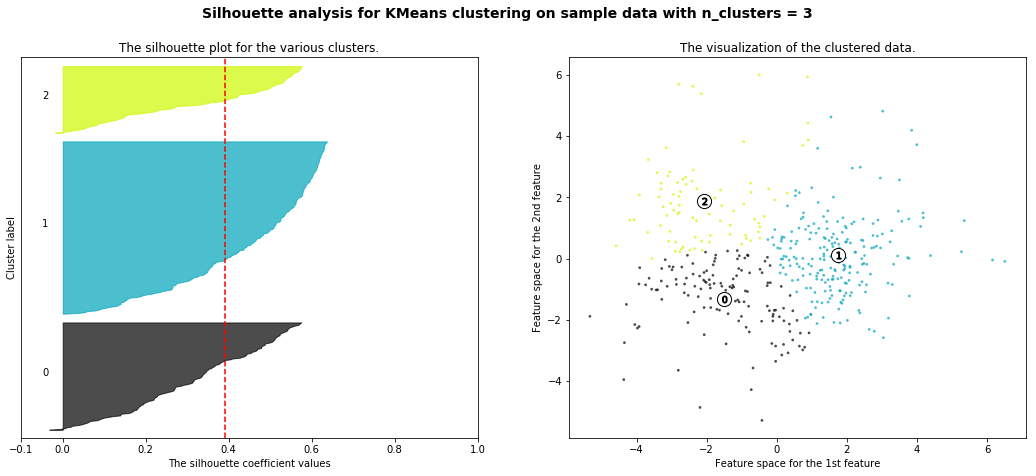

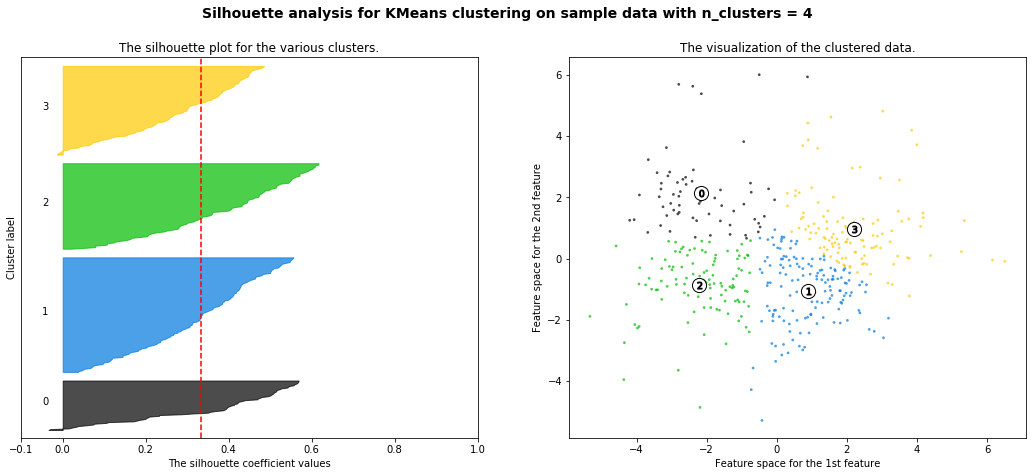

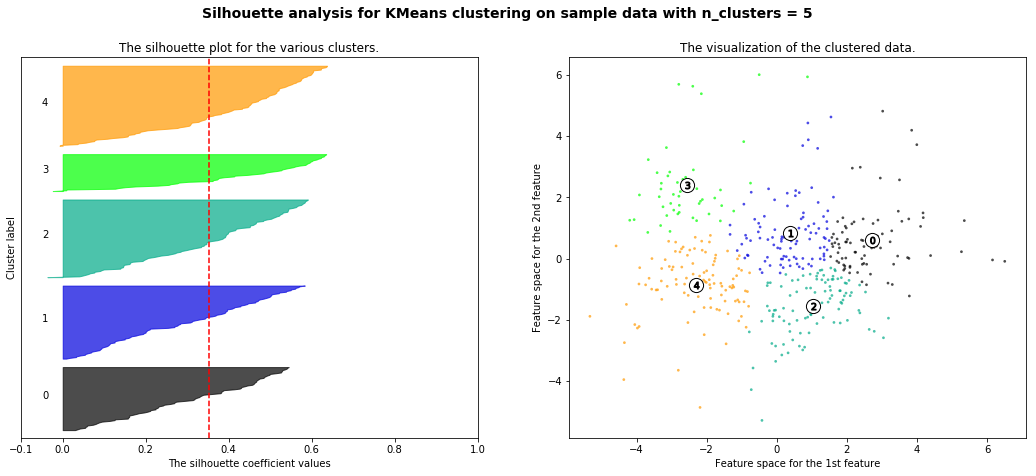

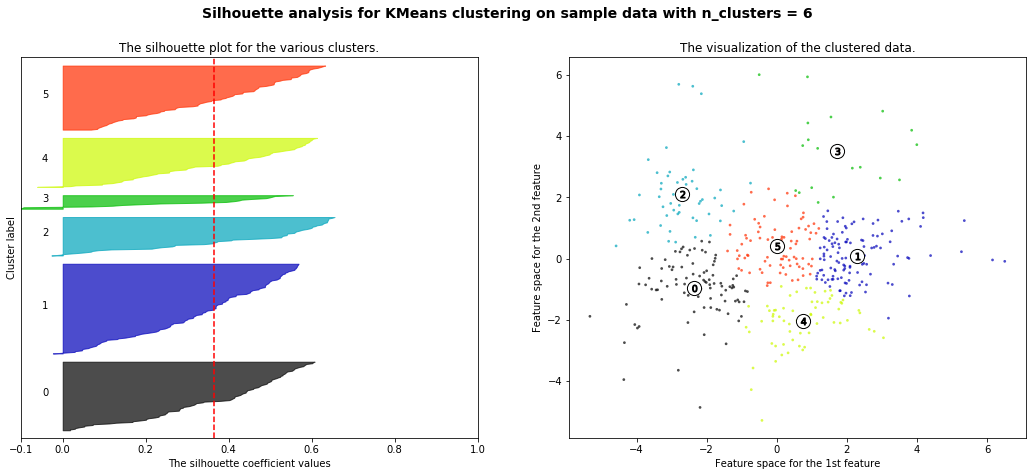

In [46]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X = reduced_data

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['Dimension 1'], X['Dimension 2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<font color = green> Below is to explore using [BIC](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html) score to choose the number of clusters as suggested by reviewer. </font>


Automatically created module for IPython interactive environment


Text(0,0.5,'Dimension 1')

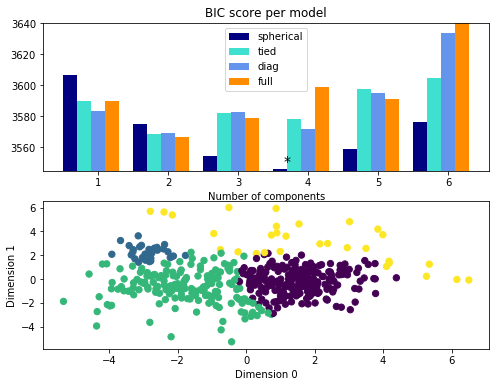

In [47]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = int(len(reduced_data)/2.0)

# Used reduced_data
X = reduced_data 

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')

xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], c=Y_, s=40, cmap='viridis')
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')

### <font color = green> Required Revision 1 additional exploration on dropping one correlated feature - Detergents_Paper</font> ###



<font color = green> Below results show that by droping Detergents_Paper, samples' clusters still can be predicted but the accuracy score is lower than before. 
</font>

In [48]:
good_data_5 = good_data.drop(columns='Detergents_Paper')

In [49]:
good_data_5.head()

,Fresh,Milk,Grocery,Frozen,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.198931
1,8.861775,9.191158,9.166179,7.474205,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.967504
3,9.492884,7.086738,8.347827,8.764678,7.488853
4,10.026369,8.596004,8.881558,8.272571,8.553525


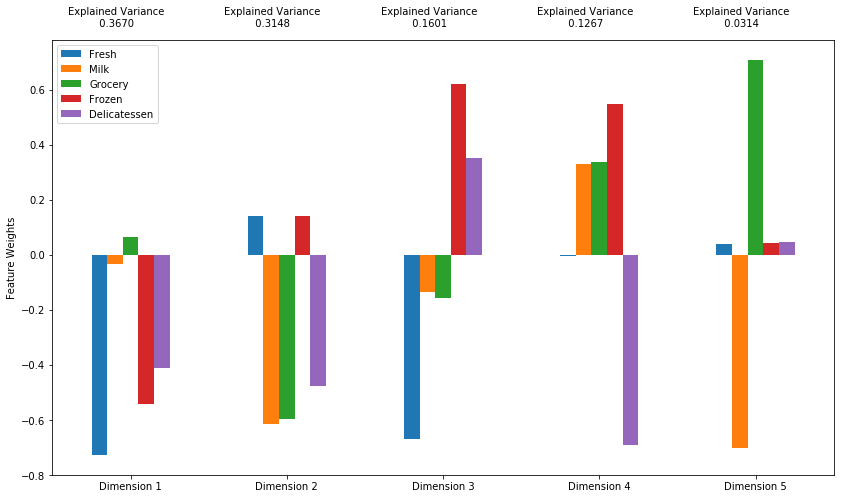

In [50]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca2 = PCA(n_components=5, random_state=1).fit(good_data_5)

# Generate PCA results plot
pca2_results = vs.pca_results(good_data_5, pca2)

In [51]:
pca2

PCA(copy=True, iterated_power='auto', n_components=5, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca_ = PCA(n_components=2,random_state=1).fit(good_data_5)

# TODO: Transform the good data using the PCA fit above
reduced_data_ = pca_.transform(good_data_5)

log_samples_=log_samples.drop(columns='Detergents_Paper')
# TODO: Transform log_samples using the PCA fit above
pca_samples_ = pca_.transform(log_samples_)

# Create a DataFrame for the reduced data
reduced_data_ = pd.DataFrame(reduced_data_, columns = ['Dimension 1', 'Dimension 2'])

0.28577433457071238

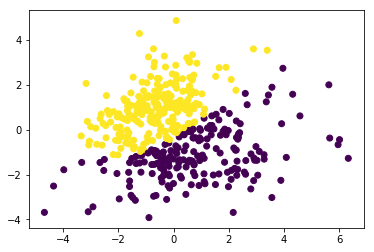

In [53]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

clusterer = GaussianMixture(n_components=2, random_state=1)
clusterer.fit(reduced_data_)
centers_ = clusterer.means_

preds_ =clusterer.predict(reduced_data_)
score = silhouette_score(reduced_data_, preds)
display(score)

plt.scatter(reduced_data_['Dimension 1'], reduced_data_['Dimension 2'], c=preds_,)

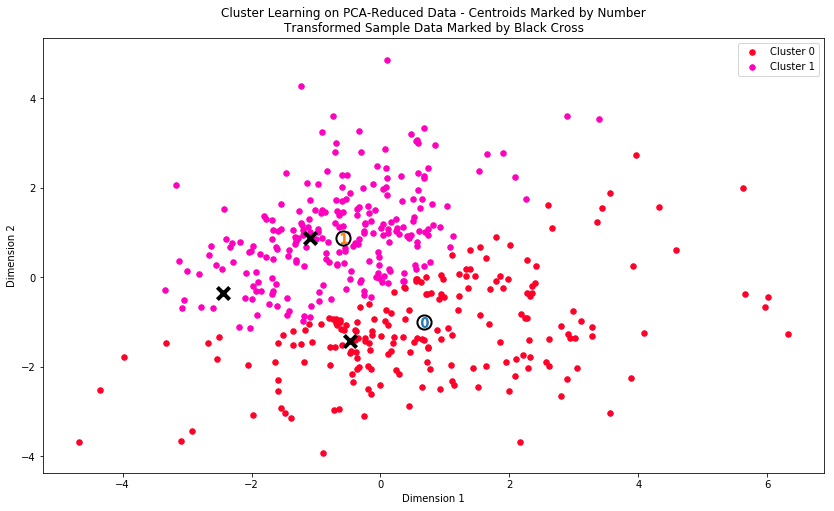

In [54]:
import visuals as vs
vs.cluster_results(reduced_data_, preds_, centers_, pca_samples_)

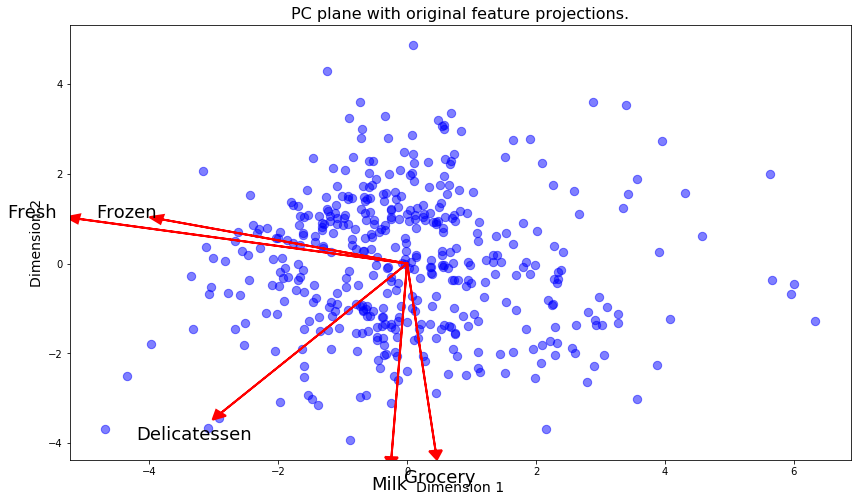

In [55]:
vs.biplot(good_data_5, reduced_data_, pca_)

In [56]:
outliers

[154, 65, 66, 128, 75]

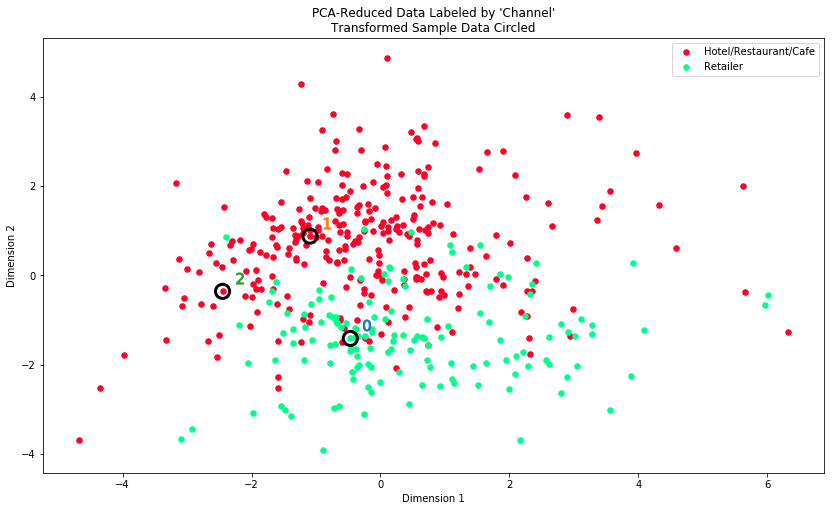

In [57]:
vs.channel_results(reduced_data_, outliers, pca_samples_)

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy_= accuracy_score(channel_labels,preds_)
display(accuracy_)
confusion_matrix(channel_labels,preds)

0.77241379310344827

array([[126,  15],
       [ 28, 266]])

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.